In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import psycopg2
import sys

import matplotlib.animation as animation
from IPython.display import HTML


pd.options.mode.chained_assignment = None 
pd.set_option('display.max_columns', None)

import warnings 
warnings.filterwarnings("ignore")

from scipy.spatial.distance import pdist, squareform


In [2]:
# Store environment variable
from getpass import getpass
dbPassword = getpass('Enter database password')

In [3]:
param_dic = {
        'database': 'big-data-bowl',
        'user': 'postgres',
        'password': dbPassword,
        'host': '34.72.136.99',
        'port': 5432,
}
def connect(params_dic):
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1) 
    print("Connection successful")
    return conn

In [4]:
def postgresql_to_dataframe(conn, select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df

In [24]:
# Import Data
games = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\games.csv")
plays = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\plays.csv")
players = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\players.csv")
week1 = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\week1.csv", low_memory=False)
week2 = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\week2.csv", low_memory=False)
week3 = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\week3.csv", low_memory=False)
week4 = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\week4.csv", low_memory=False)
week5 = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\week5.csv", low_memory=False)
week6 = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\week6.csv", low_memory=False)
week7 = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\week7.csv", low_memory=False)
week8 = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\week8.csv", low_memory=False)

pffScoutingData = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\pffScoutingData.csv")


tracking = week1.append([
    week2,
    week3,
    week4,
    week5,
    week6,
    week7,
    week8,])

joined_all = pd.merge(games,plays,how="inner",on = "gameId")
joined_all = pd.merge(joined_all,tracking,how="inner",on=["gameId","playId"])
# left join on players to keep football records
joined_all = pd.merge(joined_all,players,how="left",on = "nflId")
joined_all = pd.merge(joined_all,pffScoutingData,how="left",on=["gameId","playId",'nflId'])

In [25]:
joined_all

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,penaltyYards,prePenaltyPlayResult,playResult,foulName1,foulNFLId1,foulName2,foulNFLId2,foulName3,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event,height,weight,birthDate,collegeName,officialPosition,displayName,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,13:33,0,0,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None,6-4,225.0,1977-08-03,Michigan,QB,Tom Brady,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,13:33,0,0,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None,6-4,225.0,1977-08-03,Michigan,QB,Tom Brady,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,13:33,0,0,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None,6-4,225.0,1977-08-03,Michigan,QB,Tom Brady,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,13:33,0,0,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None,6-4,225.0,1977-08-03,Michigan,QB,Tom Brady,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,13:33,0,0,I,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None,6-4,225.0,1977-08-03,Michigan,QB,Tom Brady,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8314173,2021110100,2021,8,11/01/2021,20:15:00,KC,NYG,4433,(:35) (Shotgun) D.Jones sacked at NYG 14 for -...,4,4,15,NYG,KC,NYG,20,00:35,20,17,S,NaN,-5,-5,NaN,NaN,NaN,NaN,NaN,NaN,30.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 1 LB, 6 DB",TRADITIONAL,0,Quarters,Zone,NaN,54,2021-11-02T03:20:26.500,NaN,football,right,24.17,27.89,2.47,2.28,0.25,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8314174,2021110100,2021,8,11/01/2021,20:15:00,KC,NYG,4433,(:35) (Shotgun) D.Jones sacked at NYG 14 for -...,4,4,15,NYG,KC,NYG,20,00:35,20,17,S,NaN,-5,-5,NaN,NaN,NaN,NaN,NaN,NaN,30.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 1 LB, 6 DB",TRADITIONAL,0,Quarters,Zone,NaN,55,2021-11-02T03:20:26.600,NaN,football,right,24.36,28.03,2.36,2.16,0.24,NaN,NaN,

In [11]:
# Connect to the database
gameId = 2021090900
playId = 137

conn = connect(param_dic)
column_names = [
"gameId", 
"playId", 
"nflId",
"displayName",
"officialPosition",
"playDescription",
"frameId",
"x",
"y"
]
query = f"SELECT trd.\"gameId\", \
trd.\"playId\", \
trd.\"nflId\",  \
pl.\"displayName\", \
pl.\"officialPosition\",  \
ply.\"playDescription\", \
trd.\"frameId\", \
trd.\"x\",        \
trd.\"y\"         \
FROM trackingdata as trd                                            \
LEFT JOIN players as pl                                             \
ON trd.\"nflId\" = pl.\"nflID\" \
LEFT JOIN plays as ply \
ON trd.\"playId\" = ply.\"playId\"       \
WHERE trd.\"gameId\" = {gameId} AND trd.\"playId\" = {playId} "

# Execute the "SELECT" query
pff_joined_df = postgresql_to_dataframe(conn, query, column_names)


Connecting to the PostgreSQL database...
Connection successful


,gameId,playId,nflId,displayName,officialPosition,playDescription,frameId,x,y
0,2021090900,137,35441.0,Ndamukong Suh,DE,(13:18) (Shotgun) D.Prescott pass deep left to...,1,106.92,20.83
1,2021090900,137,35441.0,Ndamukong Suh,DE,(13:28) P.Mahomes pass incomplete deep right t...,1,106.92,20.83
2,2021090900,137,35441.0,Ndamukong Suh,DE,(13:52) (Shotgun) B.Mayfield pass incomplete s...,1,106.92,20.83
3,2021090900,137,35441.0,Ndamukong Suh,DE,(13:18) (Shotgun) D.Prescott pass deep left to...,2,106.90,20.83
4,2021090900,137,35441.0,Ndamukong Suh,DE,(13:28) P.Mahomes pass incomplete deep right t...,2,106.90,20.83
...,...,...,...,...,...,...,...,...,...
2548,2021090900,137,NaN,None,None,(13:28) P.Mahomes pass incomplete deep right t...,36,109.22,18.76
2549,2021090900,137,NaN,None,None,(13:52) (Shotgun) B.Mayfield pass incomplete s...,36,109.22,18.76
2550,2021090900,137,NaN,None,None,(13:18) (Shotgun) D.Prescott pass deep left to...,37,107.47,17.67
2551,2021090900,137,NaN,None,None,(13:28) P.Mahomes pass incomplete deep right t...,37,107.47,17.67


In [35]:
# %%
# This function is designed for the user to pick specific plays to analyze

def returnHtml(gameId,playId):
    # do work
    return pickingPressurePlay(gameId,playId)

# User input on selecting a play 
# Select Team, Formation, Pass Result
def pickingPressurePlay(gameId,playId):
    
    # load data here
    df = joined_all.loc[joined_all['gameId']==gameId]
    df = df.loc[df['playId']==playId]

    # Create empty Pandas DataFrames for user to input and for pre_snap information 
    #gameList = pd.DataFrame()

    df_presnap = pd.DataFrame()

    # Creating the pressure Gauge                        

    # loop through each game 
    for gid in df['gameId'].unique():
    # subset the data down to one game
        one_game = df.loc[df['gameId']==gid]
    
    # loop through each play
    for pid in one_game['playId'].unique():

        # subset game data down to one play 
        one_play = df.loc[df['playId']==pid]

        for oneFrame in one_play['frameId'].unique():
            one_frame = one_play.loc[one_play['frameId'] == oneFrame]


            # reset index (saving the original index as a column) and set new index as player ID 
            one_frame = one_frame.reset_index().set_index('nflId')

            # turn PFF player positioning info into unique positions given the play (for modeling purposes)
            one_frame['officialPosition'] = one_frame['officialPosition'] + one_frame.groupby('officialPosition', as_index=False).cumcount().astype(str).str.replace('0', '')
            
            # get pairwise distance, turn it into a pairwise matrix, set it in a pandas dataframe with index as nflId and columns as positions 
            _df = pd.DataFrame(squareform(pdist(one_frame.loc[:, ['x','y']])), index=one_frame.index, columns=one_frame['officialPosition'].unique())

            # concat pairwise matrix column-wise onto original one_frame data
            one_frame = pd.concat([one_frame,_df], axis=1).rename(columns={np.nan:'dist_from_ball'})

            # change index back to nflId column, set the column "index" to the true index 
            one_frame = one_frame.reset_index().set_index('index')

            # clear the index name for prettyfication 
            one_frame.index.name = None

            # append to output dataframe
            df_presnap = df_presnap.append(one_frame)


            # creating distance from QB
            

            # creating pressure value
            pressureValue = 1 / df_presnap['QB']

            df_presnap['pressureValue'] = pressureValue

            # Creating Pressure DF
            pressureDF = df_presnap[df_presnap.team != 'football']


            # fill the nulled sparse positions with -1, indicating that position was not apparent on a given play and/or frame
    positions = [x for x in df_presnap.columns.values if x not in one_game.columns.values]
    df_presnap.loc[:, positions] = df_presnap.loc[:, positions].fillna(-1)  
    # df_presnap.loc[:, ['frameId','nflId', 'officialPosition', 'gameId', 'playId','QB', 'dist_from_ball']]
    pressureDF.loc[:,['pressureValue','officialPosition']]
    # Creating Animated Pressure Gauge for individual plays
    
    defense = [
    'OLB','MLB','ILB','DE','SS','FS','CB','DT','NT',
    'OLB1','OLB2','OLB3','OLB4','OLB5',
    'MLB1','MLB2','MLB3','MLB4','MLB5',
    'ILB1','ILB2','ILB3','ILB4','ILB5',
    'DE1','DE2','DE3','DE4','DE5',
    'SS1','SS2','SS3','SS4','SS5',
    'FS1','FS2','FS3','FS4','FS5',
    'CB1','CB2','CB3','CB4','CB5','CB6','CB7',
    'DT1','DT2','DT3','DT4','DT5',
    'NT1','NT2','NT3','NT4','NT5'
    ]

    offense = [
    'QB','RB','WR','TE','FB','T','G','C',
    'QB1','QB2','QB3',
    'RB1','RB2','RB3','RB4',
    'WR','WR1','WR2','WR3','WR4','WR5','WR6','WR7','WR8',
    'TE','TE1','TE2','TE3','TE4',
    'FB1','FB2','FB3',
    'T','T1','T2','T3','T4',
    'G','G1','G2','G3','G4',
    'C','C1','C2','C3'
    ]

    pressureRange = pressureDF[['frameId','officialPosition','pressureValue','displayName', 'gameId','playDescription']]

    for offender in offense:
        pressureRange = pressureRange[pressureRange.officialPosition != offender]
        
    

    df = pressureRange 

    current_frame = 1
    frameMin = df['frameId'].min()
    frameMax = df['frameId'].max()
    playDescription = df.playDescription.values[0]
    if len(playDescription.split(" "))>15 and len(playDescription)>115:
        playDescription = " ".join(playDescription.split(" ")[0:16]) + "<br>" + " ".join(playDescription.split(" ")[16:])
    dff = df[df['frameId'].eq(current_frame)].sort_values(by='pressureValue',ascending=False)

    
    colors = dict(zip([
    'OLB','MLB','ILB','DE','SS','FS','CB','DT','NT',
    'OLB1','OLB2','OLB3','OLB4','OLB5',
    'MLB1','MLB2','MLB3','MLB4','MLB5',
    'ILB1','ILB2','ILB3','ILB4','ILB5',
    'DE1','DE2','DE3','DE4','DE5',
    'SS1','SS2','SS3','SS4','SS5',
    'FS1','FS2','FS3','FS4','FS5',
    'CB1','CB2','CB3','CB4','CB5','CB6','CB7',
    'DT1','DT2','DT3','DT4','DT5',
    'NT1','NT2','NT3','NT4','NT5'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
    '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
    '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
    '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
    '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
    '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
    '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
    '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',]
    ))

    group_lk = df.set_index('displayName')['officialPosition'].to_dict()

    dff = dff[::-1]   # flip values from top to bottom
    

    def draw_barchart(frame):
        dff = df[df['frameId'].eq(frame)].sort_values(by='pressureValue', ascending=True)
        ax.clear()
        ax.barh(dff['displayName'], dff['pressureValue'].round(decimals = 3), color=[colors[group_lk[x]] for x in dff['displayName']])
        dx = dff['pressureValue'].max() / 200
        for i, (value, name) in enumerate(zip(dff['pressureValue'].round(decimals = 3), dff['displayName'])):
            ax.text(value-dx, i-.05,     name,           size=14, weight=800, ha='right', va='bottom')
            ax.text(value-dx, i+.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
            ax.text(value-dx*10, i-.25,     value,  size=14, ha='left',  va='center')
        # ... polished styles
        ax.text(1, 0.4, frame, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=500)
        ax.text(0, 1.06, 'pressureValue', transform=ax.transAxes, size=12, color='#777777')
        ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
        ax.xaxis.set_ticks_position('top')
        ax.tick_params(axis='x', colors='#777777', labelsize=12)
        ax.set_yticks([])
        ax.margins(0, 0.01)
        ax.grid(which='major', axis='x', linestyle='-')
        ax.set_axisbelow(True)
        ax.text(0, 1.12, f'{playDescription}',
                transform=ax.transAxes, size=24, weight=600, ha='left')
        ax.text(1, 0, 'by Dennis K.', transform=ax.transAxes, ha='right',
                color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
        plt.box(False)
        
    

    # %%
    fig, ax = plt.subplots(figsize=(15, 16))
    animator = animation.FuncAnimation(fig, draw_barchart, frames=range(frameMin, frameMax))
    return HTML(animator.to_jshtml()) 
    


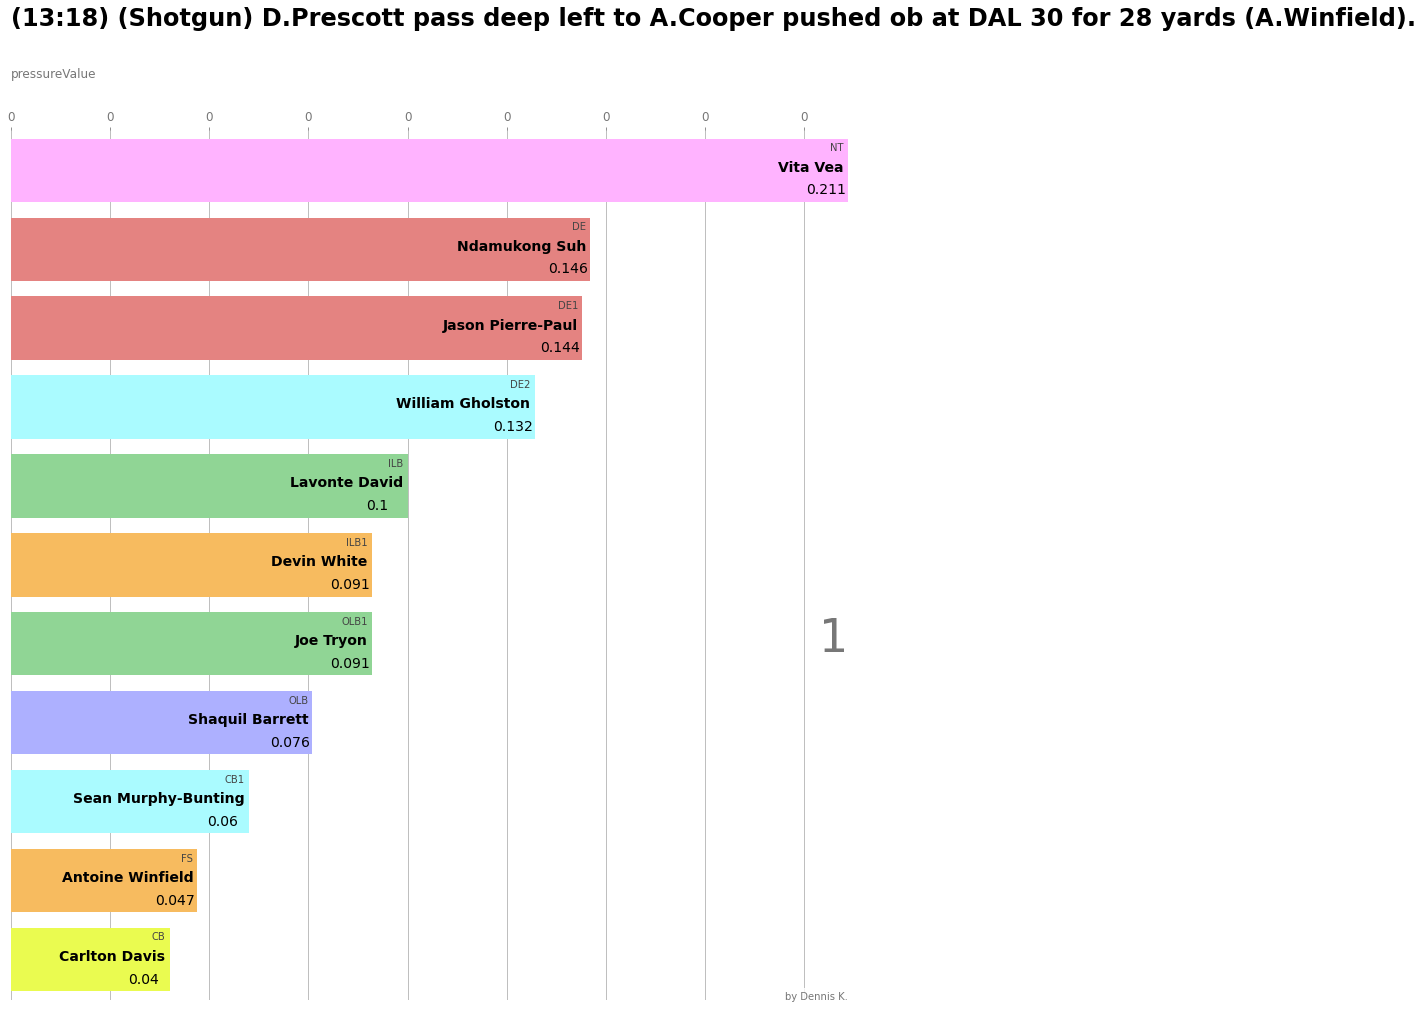

In [36]:
returnHtml(2021090900,137)